# Objectives¶
* Create and customize
* Area plot
* Histogram
* Bar charts on a dataset

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.style.use('ggplot')

In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.shape

(195, 39)

In [6]:
years = list(map(str, range(1980, 2014)))

# Area Plots
### Showing top 5 countries

In [11]:
df_can.sort_values(['Total'], axis=0, ascending=False, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


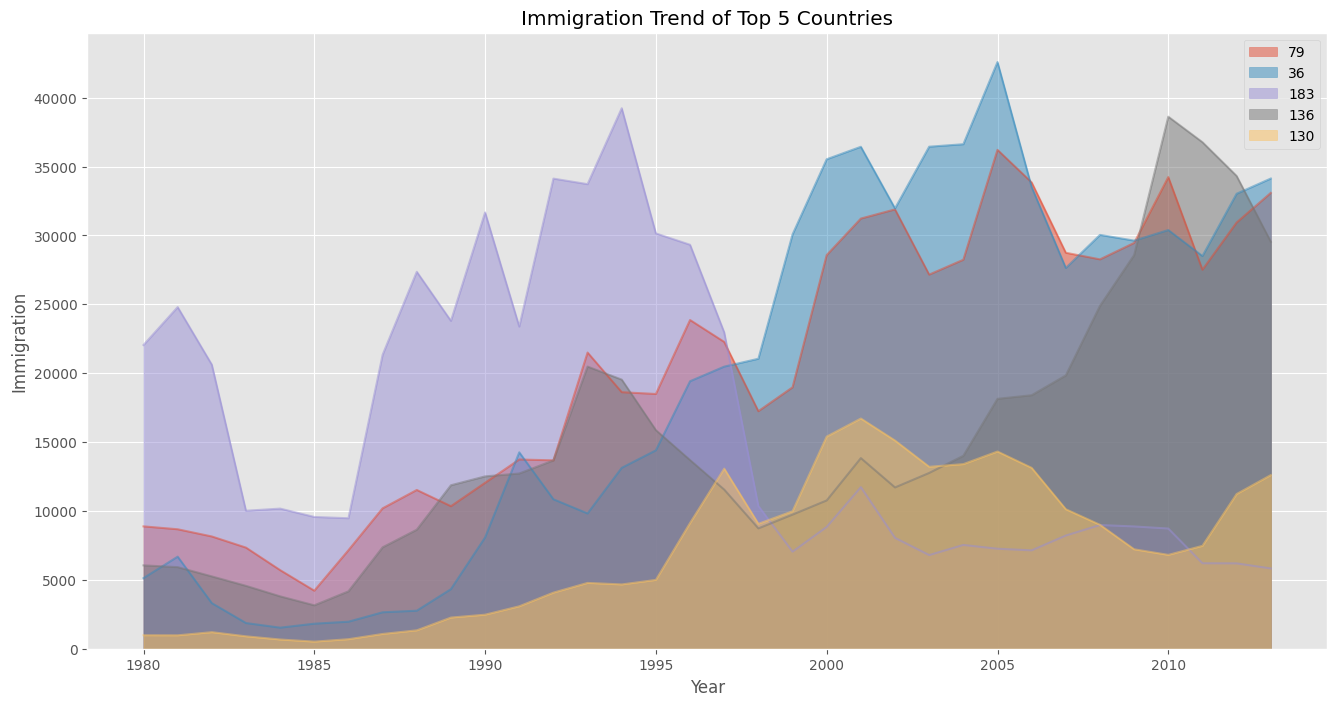

In [13]:
df_top5.index = df_top5.index.map(str)
df_top5.plot(kind='area', stacked=False, figsize=(16, 8))
plt.title("Immigration Trend of Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Immigration")
plt.show()

##### The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

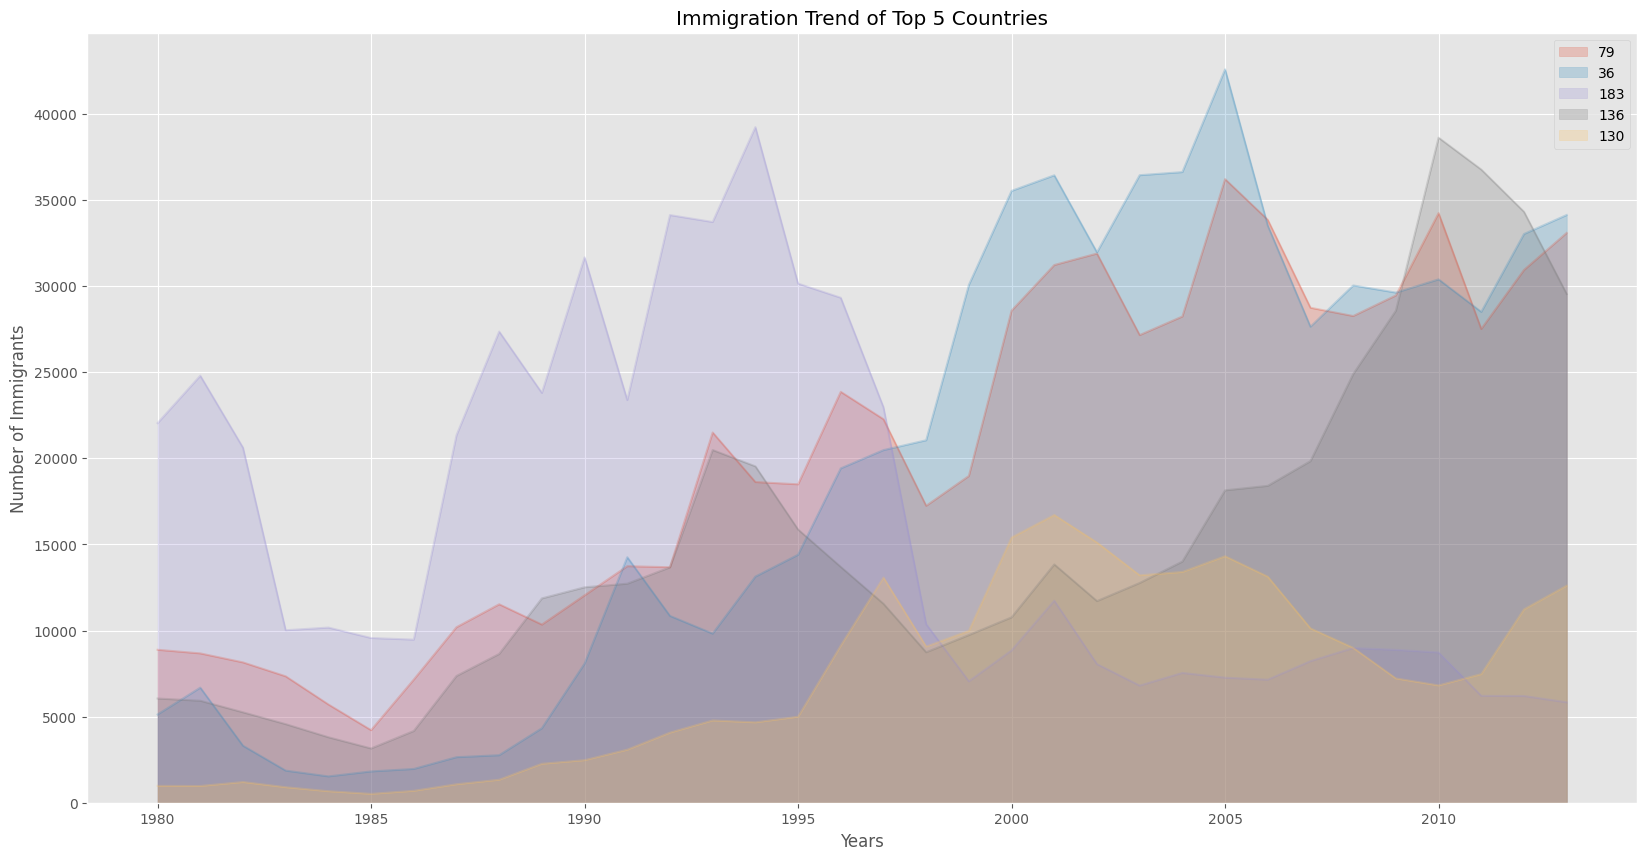

In [14]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)

In [24]:
# ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
# 
# ax.set_title('Immigration Trend of Top 5 Countries')
# ax.set_ylabel('Number of Immigrants')
# ax.set_xlabel('Years')

# Histograms

In [16]:
df_can['2013'].head()

79     33087
36     34129
183     5827
136    29544
130    12603
Name: 2013, dtype: int64

In [18]:
count, bin_edges = np.histogram(df_can['2013'])
print(count) # frequency count
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


<Axes: ylabel='Frequency'>

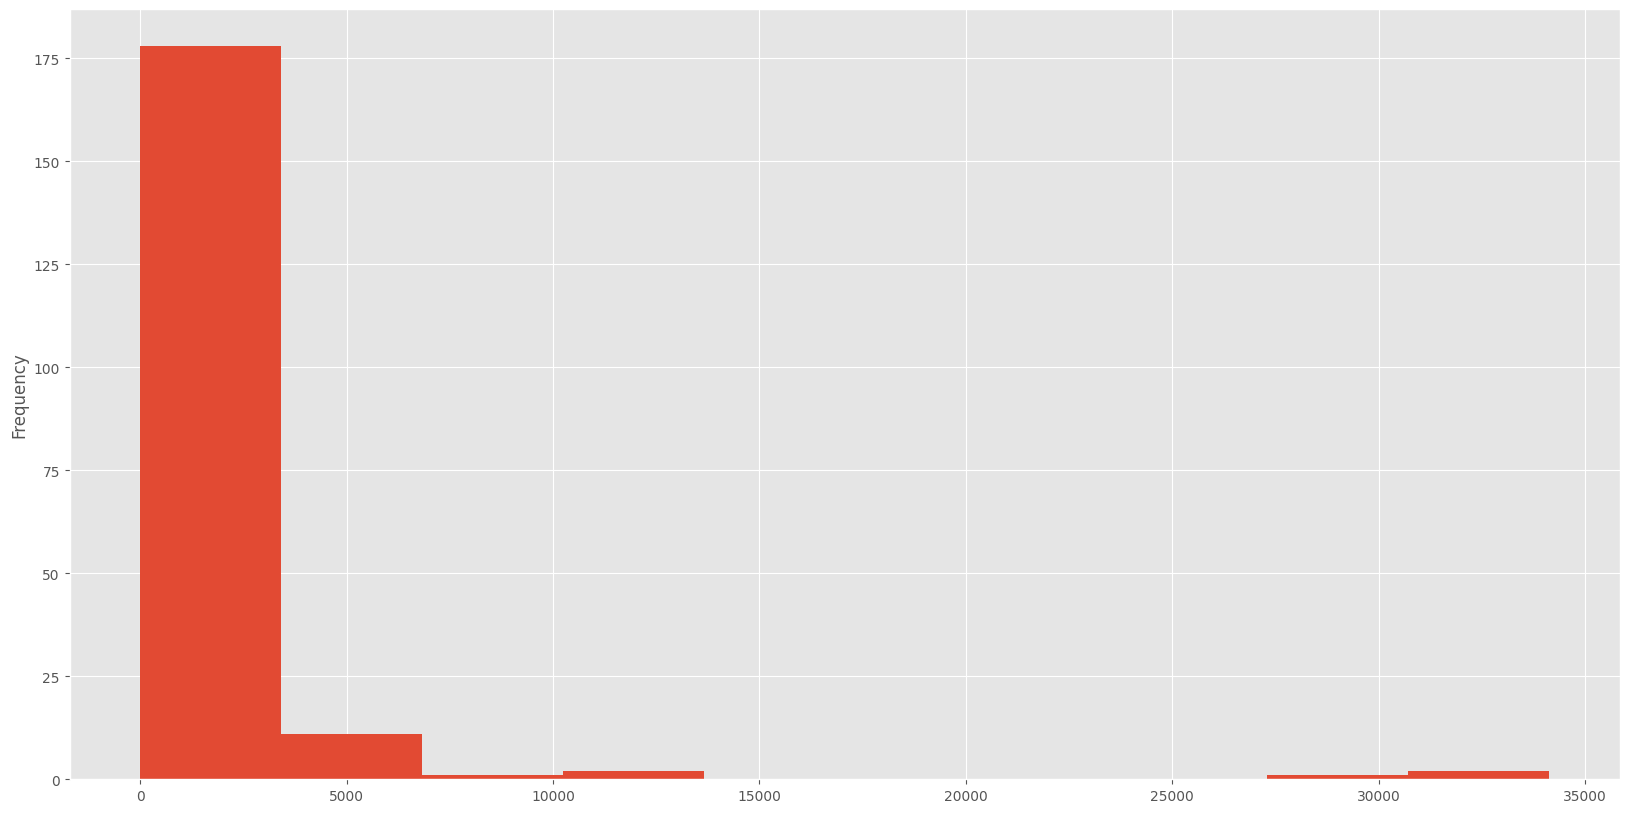

In [20]:
df_can['2013'].plot(kind='hist', stacked=False, figsize=(20, 10))

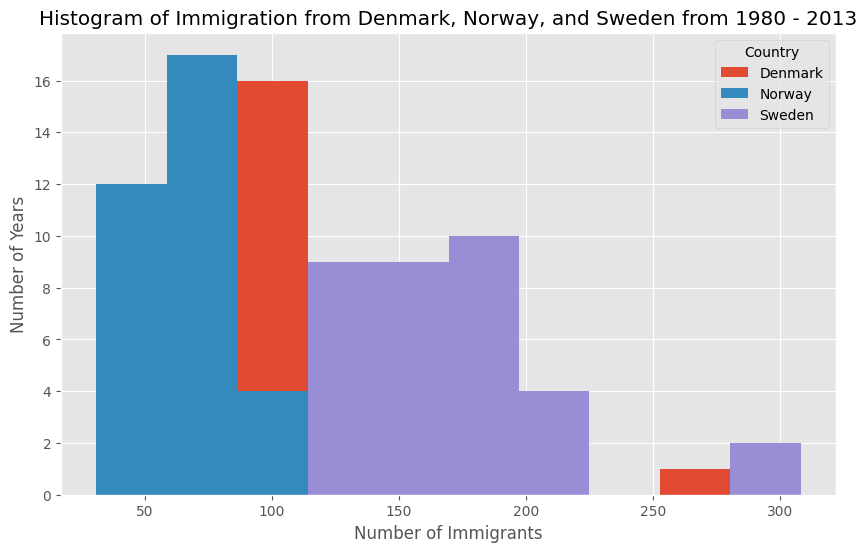

In [32]:
if 'Country' in df_can.columns:
    df_can = df_can.set_index('Country')
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts

In [38]:
df_ice = df_can.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

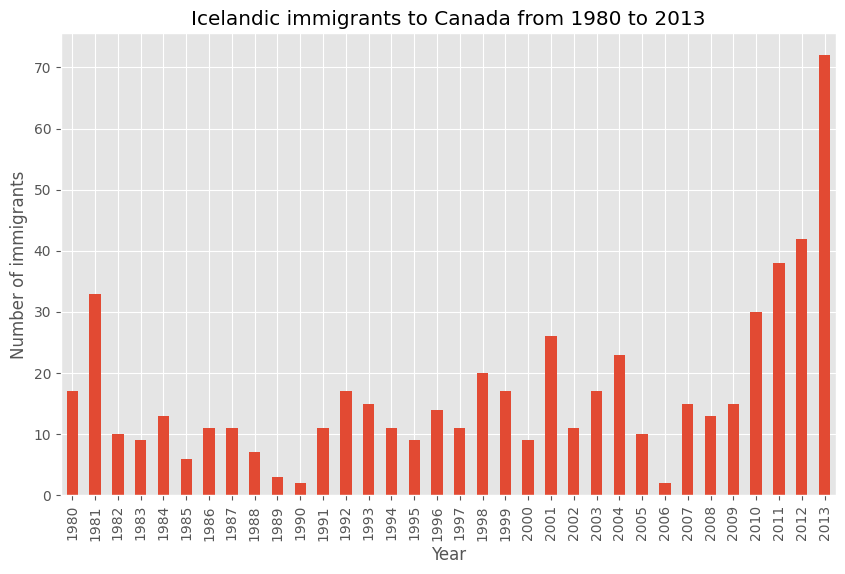

In [43]:
df_ice.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 
plt.show()